In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from matplotlib import colors, ticker, cm
from matplotlib.mlab import bivariate_normal

Define function to generate classification samples

In [2]:
'''
Simple classicifation problem
y = 1, when x1^2/a^2 + x2^2/b^2 <= 1.
y = 0, otherwise
'''
def generatingData(N, a, b):
    '''
    :param N: Training set size
    :param a: parameter
    :param b: parameter
    :return: training set
    '''
    x1 = 2.*(np.random.rand(N) - 1./2.)
    x2 = 2.*(np.random.rand(N) - 1./2.)
    y = np.zeros(N)
    for i in range(N):
        if x1[i]**2/a**2 + x2[i]**2/b**2 <= 1.:
            y[i] = 1
    return x1, x2, y


Plotting samples

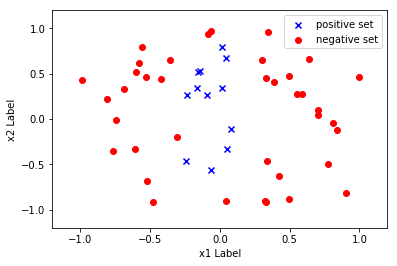

In [3]:
'''Ploting the generated data'''
x1, x2, y = generatingData(50, 0.3, 0.8)
posi_x = []
posi_y = []
nega_x = []
nega_y = []

for i in range(50):
    if y[i] == 1:
        posi_x.append(x1[i])
        posi_y.append(x2[i])
    else:
        nega_x.append(x1[i])
        nega_y.append(x2[i])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(posi_x, posi_y, c='b', marker='x', label = "positive set")
ax.scatter(nega_x, nega_y, c='r', marker='o', label = "negative set")

ax.set_xlabel('x1 Label')
ax.set_ylabel('x2 Label')
ax.set_xlim((-1.2, 1.2))
ax.set_ylim((-1.2, 1.2))
ax.legend()

plt.show()

Define training routines:

In [4]:
'''Define Training function'''
def sigmoidFunction(x_vec, h_vec):
    '''
    define sigmoid Function h(x)
    :param x_vec: features
    :param h_vec: parameters
    :return: function value
    '''
    z = np.dot(x_vec, h_vec)
    return 1./(1. + np.exp(-z))

def trainingData(x1, x2, y, h_vec, l_rate, r_fact, N_step, Hypo):
    '''
    :param x1: feature #1
    :param x2: feature #2
    :param y: output values
    :param h_vec: parameters
    :param l_rate: learning rate
    :param r_fact: regularization factor
    :param N_step: number of iteration steps
    :param Hypo: Hypothesis
    :return: trainted parameters
    '''
    m = len(x1)
    for step in range(N_step):
        h_tmp = h_vec
        regu = l_rate/m * r_fact * h_vec
        regu[0] = 0.
        for i in range(m):
            x_vec = np.array([1, x1[i], x2[i], x1[i]**2, x2[i]**2, x1[i]*x2[i]])
            h_vec -= l_rate/m * (Hypo(x_vec, h_tmp) - y[i]) * x_vec + regu
    return h_vec

Training the data:

In [6]:
'''Training data'''
h_init = np.random.rand(6)
l_rate = 0.05
r_val = 0.
parameters = trainingData(x1, x2, y, h_init, l_rate, r_val, 30000, sigmoidFunction)
print(parameters)

[  2.40770432  -1.71214789   0.48442343 -18.09464562  -4.70571422
   0.83615702]


In [7]:
'''create mesh'''
x_plt = linspace(-1.2, 1.2, 300)
y_plt = linspace(-1.2, 1.2, 300)
X, Y = np.meshgrid(x_plt, y_plt)
print(X, len(X), len(X[0]))

[[-1.2        -1.19197324 -1.18394649 ...,  1.18394649  1.19197324  1.2       ]
 [-1.2        -1.19197324 -1.18394649 ...,  1.18394649  1.19197324  1.2       ]
 [-1.2        -1.19197324 -1.18394649 ...,  1.18394649  1.19197324  1.2       ]
 ..., 
 [-1.2        -1.19197324 -1.18394649 ...,  1.18394649  1.19197324  1.2       ]
 [-1.2        -1.19197324 -1.18394649 ...,  1.18394649  1.19197324  1.2       ]
 [-1.2        -1.19197324 -1.18394649 ...,  1.18394649  1.19197324  1.2       ]] 300 300


In [8]:
'''def prediction function'''
def prediction(input_x, input_y, par):
    '''
    :param input_x: x1 feature
    :param input_y: x2 feature
    :param par: parameters
    :return: prediction
    '''
    x_vec = np.array([1, input_x, input_y, input_x**2, input_y**2, input_x*input_y])
    z = np.dot(x_vec, par)
    if(z >=0 ):
        return 1
    else:
        return -1

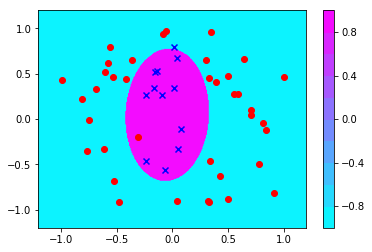

In [10]:
'''make contour plot'''
fig = plt.figure()

Z = [[0. for i in range(300)] for i in range(300)]
for i in range(300):
    for j in range(300):
        Z[i][j] = prediction(X[i][j], Y[i][j],parameters)
plt.contourf(X, Y, Z, 10,
                  cmap=plt.cm.cool)
plt.axes().scatter(posi_x, posi_y, c='b', marker='x', label = "positive set")
plt.axes().scatter(nega_x, nega_y, c='r', marker='o', label = "negative set")
plt.colorbar()
plt.show()
